(1427, 2100, 3)


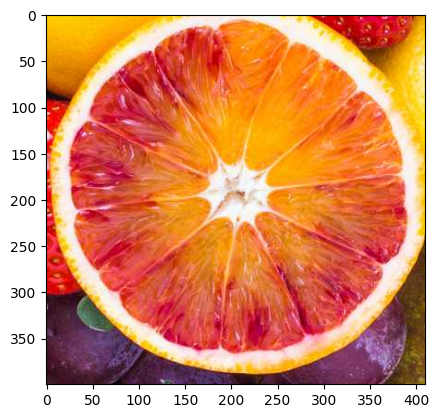

In [1]:
#1.Viết trương trình chuyển đổi ảnh
# 1.1 Chọn đối tượng trong ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh đầu vào
data = iio.imread('fruit.jpg')

# Cắt vùng ảnh chứa đối tượng (từ hàng 800 đến 1200, cột 570 đến 980)
bmg = data[800:1200, 570:980]
print(data.shape)

# Lưu ảnh đã cắt thành file mới
iio.imsave('orange.jpg', bmg)

# Hiển thị ảnh đã cắt
plt.imshow(bmg)
plt.show()


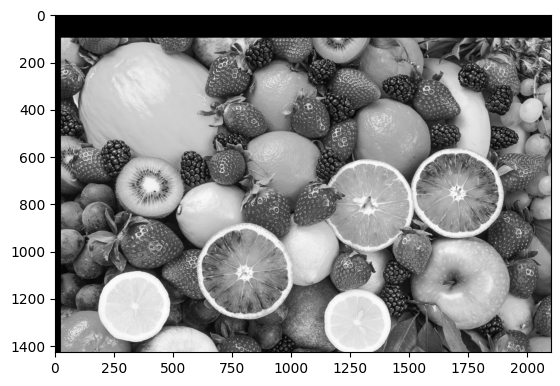

In [7]:
# 1.2 Tịnh tiến đơn
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh đầu vào ở dạng ảnh xám (grayscale)
data = iio.imread('fruit.jpg', mode='L')

# Dịch chuyển ảnh: 100 pixel theo chiều dọc, 25 pixel theo chiều ngang
bdata = nd.shift(data, (100, 25))

# Hiển thị ảnh đã tịnh tiến
plt.imshow(bdata, cmap='gray')
plt.show()



(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


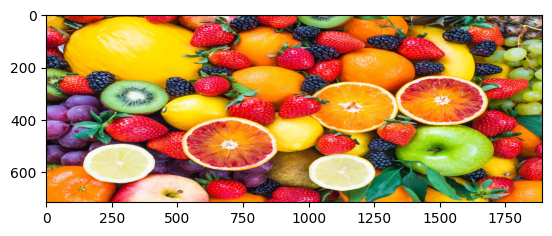

In [8]:
# 1.3 Thay đổi kích thước ảnh
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

# Phóng to ảnh theo tỉ lệ (zoom 2 lần)
bdata = nd.zoom(data, 2)
print(bdata.shape)

# Phóng to theo chiều cao và chiều rộng (zoom riêng từng trục)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)

# Thu nhỏ theo từng tỉ lệ cụ thể
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()


(1427, 2100, 3)


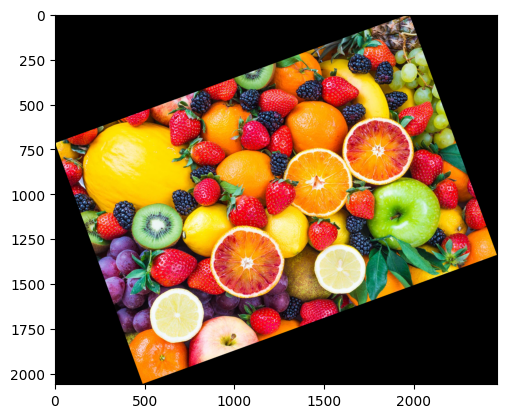

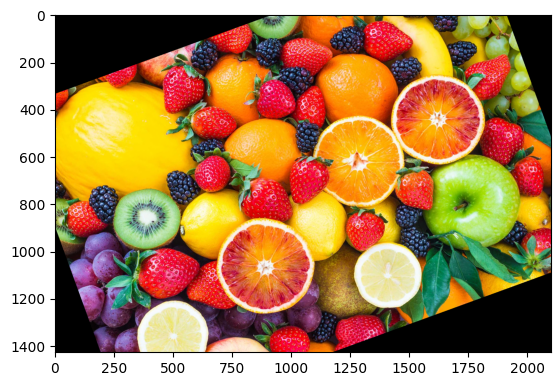

In [10]:
# 1.4 Xoay ảnh
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh
data = iio.imread('fruit.jpg')
print(data.shape)

# Xoay ảnh 20 độ (cho phép reshape)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

# Xoay ảnh 20 độ (giữ kích thước ảnh ban đầu)
d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()


(309, 515)


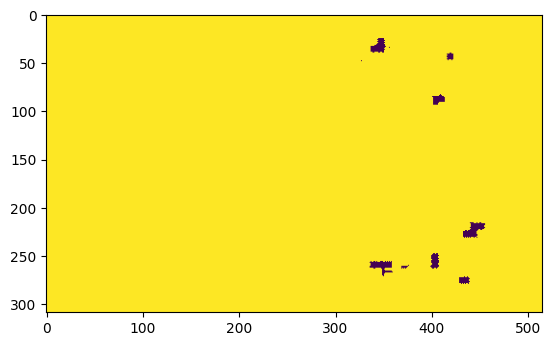

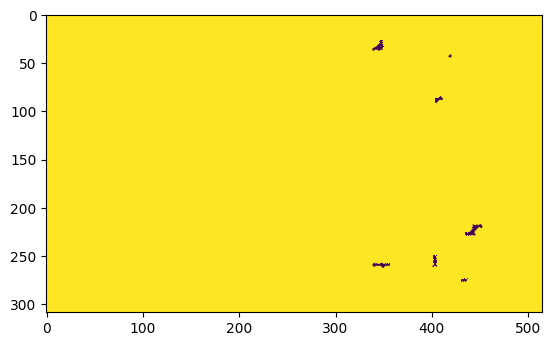

In [17]:
#1.5 Dilation và Erosion
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh ở chế độ xám
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)

# Dilation mặc định (1 lần)
d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

# Dilation 3 lần
d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()


(309, 515)


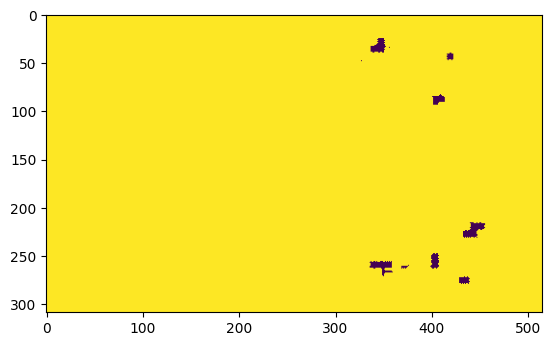

In [19]:
#1.6 Coordinate Mapping
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

# Đọc ảnh grayscale
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5  # độ lệch tối đa
q = 2 * d * np.random.ranf(M.shape) - d  # nhiễu ngẫu nhiên
mp = (M + q).astype(int)

# Biến đổi ảnh theo mapping mới
bdata = nd.map_coordinates(data, mp)

plt.imshow(d1)
plt.show()


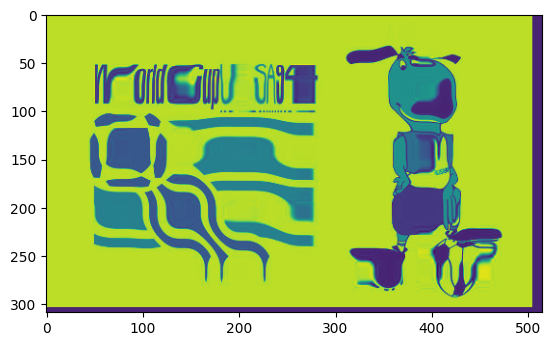

In [21]:
#1.7 Biến đổi chung (Generic Transformation )
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Định nghĩa hàm ánh xạ toạ độ (coordinate mapping function)
def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Đọc ảnh đầu vào
data = iio.imread('world_cup.jpg', mode='F')

# Thực hiện biến đổi hình học bằng hàm tự định nghĩa
d1 = nd.geometric_transform(data, GeoFun)

# Hiển thị ảnh sau biến đổi
plt.imshow(d1)
plt.show()


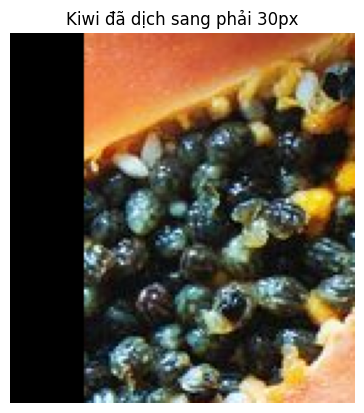

In [9]:
#2 Bài tập
# Bài 1: Cắt quả kiwi và tịnh tiến sang phải 30 pixels
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc ảnh đầu vào từ thư mục exercise
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Cắt vùng chứa quả kiwi (chỉnh tọa độ tùy vị trí quả kiwi)
kiwi = data[450:600, 380:520]

# Dịch sang phải 30 pixel
kiwi_shifted = nd.shift(kiwi, (0, 30, 0))

# Hiển thị kết quả
plt.imshow(kiwi_shifted)
plt.title('Kiwi đã dịch sang phải 30px')
plt.axis('off')
plt.show()



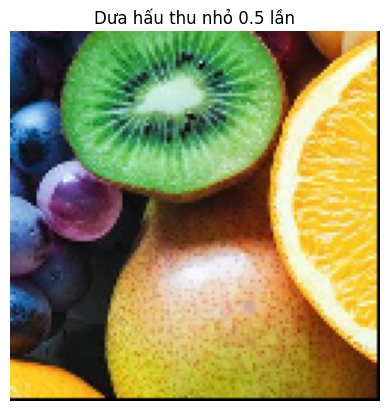

In [3]:
# Bài 2: Cắt quả dưa hấu và thu nhỏ 0.5 lần
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc ảnh từ thư mục exercise
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Cắt vùng ảnh chứa quả dưa hấu (chỉnh tùy theo ảnh)
watermelon = data[150:400, 100:350]

# Thu nhỏ ảnh 0.5 lần
small_watermelon = nd.zoom(watermelon, (0.5, 0.5, 1))

# Hiển thị kết quả
plt.imshow(small_watermelon)
plt.title('Dưa hấu thu nhỏ 0.5 lần')
plt.axis('off')
plt.show()


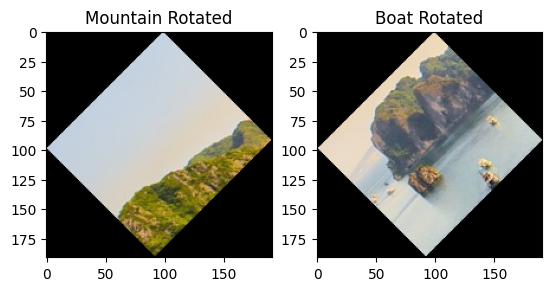

In [10]:
#Bài 3
# Bài 3: Cắt núi và thuyền rồi xoay 45 độ
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc ảnh
img = iio.imread('exercise/quang_ninh.jpg')

# Cắt vùng ngọn núi
mountain = img[30:160, 30:170]

# Cắt vùng con thuyền
boat = img[120:250, 220:360]

# Xoay mỗi vùng 45 độ
mountain_rotated = nd.rotate(mountain, 45, reshape=True)
boat_rotated = nd.rotate(boat, 45, reshape=True)

# Hiển thị và lưu
plt.subplot(1, 2, 1)
plt.imshow(mountain_rotated)
plt.title("Mountain Rotated")

plt.subplot(1, 2, 2)
plt.imshow(boat_rotated)
plt.title("Boat Rotated")

plt.show()

# Lưu ảnh
iio.imsave('mountain_rotated.jpg', mountain_rotated)
iio.imsave('boat_rotated.jpg', boat_rotated)


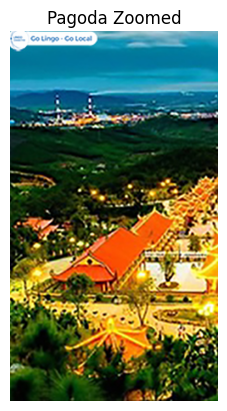

In [27]:
# Bài 4: Cắt ảnh chùa và phóng to 5 lần
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc ảnh
img = iio.imread('exercise/pagoda.jpg')

# Cắt vùng ngôi chùa
pagoda = img[10:400, 10:200]

# Phóng to 5 lần
pagoda_zoomed = nd.zoom(pagoda, (5, 5,1 ))

# Hiển thị và lưu
plt.imshow(pagoda_zoomed)
plt.axis('off')
plt.title('Pagoda Zoomed')
plt.show()

# Lưu ảnh
iio.imsave('pagoda_zoomed.jpg', pagoda_zoomed)


Chọn hình:
1 - Fruits
2 - Quảng Ninh
3 - Pagoda

Chọn phép biến đổi:
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate Map


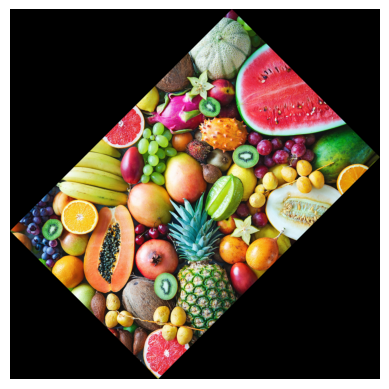

In [1]:
# Bài 5: Menu thực hiện các phép biến đổi trên hình
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt

# Đọc 3 ảnh bất kỳ
img1 = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
img2 = iio.imread('exercise/quang_ninh.jpg')
img3 = iio.imread('exercise/pagoda.jpg')

# Lựa chọn hình
print("Chọn hình:\n1 - Fruits\n2 - Quảng Ninh\n3 - Pagoda")
choice = input("Nhập số hình (1/2/3): ")

if choice == '1':
    img = img1
elif choice == '2':
    img = img2
else:
    img = img3

# Hiển thị menu
print("\nChọn phép biến đổi:")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map")

option = input("Nhập lựa chọn (T/X/P/H/C): ")

# Xử lý từng phép
if option.upper() == 'T':
    img_shifted = nd.shift(img, (50, 30, 0))
    plt.imshow(img_shifted)
elif option.upper() == 'X':
    img_rotated = nd.rotate(img, 45)
    plt.imshow(img_rotated)
elif option.upper() == 'P':
    img_zoomed = nd.zoom(img, (2, 2, 1))
    plt.imshow(img_zoomed)
elif option.upper() == 'H':
    img_shrink = nd.zoom(img, (0.5, 0.5, 1))
    plt.imshow(img_shrink)
elif option.upper() == 'C':
    V, H, _ = img.shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    img_gray = np.mean(img, axis=2)  # chuyển ảnh sang xám
    img_mapped = nd.map_coordinates(img_gray, mp)
    plt.imshow(img_mapped, cmap='gray')
else:
    print("Lựa chọn không hợp lệ!")
    exit()

plt.axis('off')
plt.show()
